In [1]:
# Load the Libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_blobs

2023-06-14 17:10:03.803005: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Multi-Class Classification
Neural Networks are often used to classify data. Examples are neural networks:
- take in photos and classify subjects in the photos as {dog,cat,horse,other}
- take in a sentence and classify the 'parts of speech' of its elements: {noun, verb, adjective etc..}  

A network of this type will have multiple units in its final layer. Each output is associated with a category. When an input example is applied to the network, the output with the highest value is the category predicted. If the output is applied to a softmax function, the output of the softmax will provide probabilities of the input being in each category. 

In this lab you will see an example of building a multiclass network in Tensorflow. We will then take a look at how the neural network makes its predictions.

Let's start by creating a four-class data set.

In [2]:
# Data Set

classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

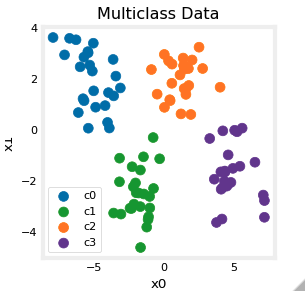
Each dot represents a training example. The axis (x0,x1) are the inputs and the color represents the class the example is associated with. Once trained, the model will be presented with a new example, (x0,x1), and will predict the class.  

While generated, this data set is representative of many real-world classification problems. There are several input features (x0,...,xn) and several output categories. The model is trained to use the input features to predict the correct output category.

In [3]:
# Show the Classes in Data Set
print(f"Unique Classes: {np.unique(y_train)}")
# Show How the classes are represented
print(f"Class Representation: {y_train[:10]}")
# Show the Shapes of our Data Set
print(f"Shape of X_train: {X_train.shape}, Shape of y_train: {y_train.shape}")

Unique Classes: [0 1 2 3]
Class Representation: [3 3 3 0 3 3 3 3 2 0]
Shape of X_train: (100, 2), Shape of y_train: (100,)


## Model
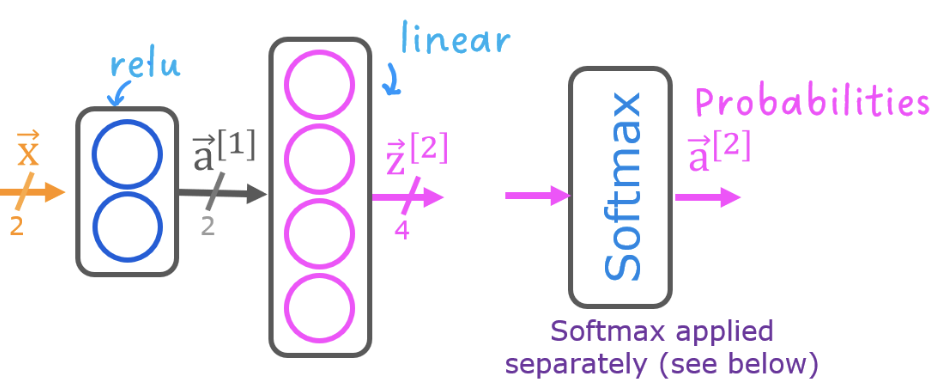
This lab will use a 2-layer network as shown.
Unlike the binary classification networks, this network has four outputs, one for each class. Given an input example, the output with the highest value is the predicted class of the input.   

Below is an example of how to construct this network in Tensorflow. Notice the output layer uses a `linear` rather than a `softmax` activation. While it is possible to include the softmax in the output layer, it is more numerically stable if linear outputs are passed to the loss function during training. If the model is used to predict probabilities, the softmax can be applied at that point.

In [4]:
model = Sequential(
    [
    Dense(units=2, activation="relu", name="L1"),
    Dense(units=4, activation="linear", name="L2")
    ]
)

2023-06-14 17:10:10.185743: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The statements below compile and train the network. Setting `from_logits=True` as an argument to the loss function specifies that the output activation was linear rather than a softmax.

In [5]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4/4 [==============================] - 1s 3ms/step - loss: 1.5284
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 1.3992
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 1.3054
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 1.2326
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - l

4/4 [==============================] - 0s 2ms/step - loss: 0.0577
Epoch 94/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0566
Epoch 95/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0555
Epoch 96/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 97/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0537
Epoch 98/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 99/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0519
Epoch 100/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0510
Epoch 101/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0501
Epoch 102/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0493
Epoch 103/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0485
Epoch 104/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0478
Epoch 105/200
4/4 [==============================] - 0s 2ms/

4/4 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 196/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 197/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 198/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 199/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 200/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0156


With the model trained, we can see how the model has classified the training data.
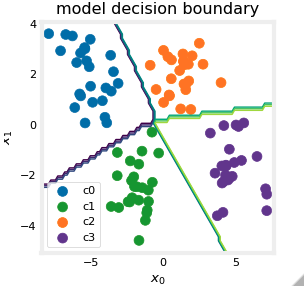

Above, the decision boundaries show how the model has partitioned the input space.  This very simple model has had no trouble classifying the training data. How did it accomplish this? Let's look at the network in more detail. 

Below, we will pull the trained weights from the model and use that to plot the function of each of the network units. Further down, there is a more detailed explanation of the results. You don't need to know these details to successfully use neural networks, but it may be helpful to gain more intuition about how the layers combine to solve a classification problem.

In [6]:
# Get the Trained Parameters from the First Layer

l1 = model.get_layer("L1")
W1, b1 = l1.get_weights()

The weights of the first unit are [1.22 0.6]. The way the weights are structured in the matrix is that each row corresponds to the weights of a single neuron for all input features.

Here, [1.22 0.6] are the weights for the first input feature and second input feature for the first neuron. Similarly, [0.92 -1.7] are the weights for the first and second input features for the second neuron.

So the weight between the first input feature and the first neuron is 1.22, and the weight between the second input feature and the first neuron is 0.6.

Similarly, the weight between the first input feature and the second neuron is 0.92, and the weight between the second input feature and the second neuron is -1.7.

In [7]:
print(f"W1:\n {W1}")
print(f"b1:\n {b1}")

W1:
 [[-1.4479077   0.28372616]
 [-0.6503593  -2.6198928 ]]
b1:
 [0.7315425 1.3700966]


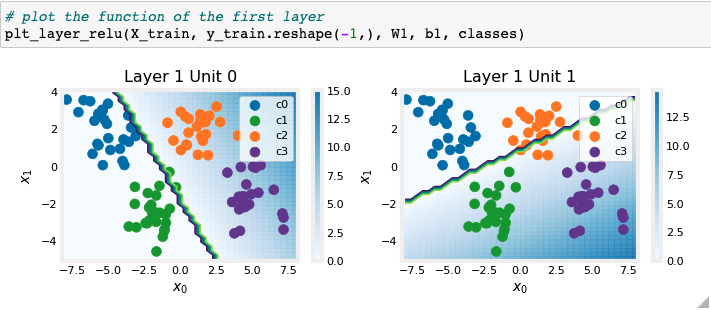

In [8]:
# Get the Trained Parameters from the Second Layer

l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()

In [9]:
print(f"W2:\n {W2}")
print(f"b2:\n {b2}")

W2:
 [[ 1.3120265   0.41015613 -0.92143863 -3.4580102 ]
 [-1.8822232   0.8273163  -1.8852851   1.749025  ]]
b2:
 [-1.4218622 -1.6653719  3.0356386 -0.9794255]


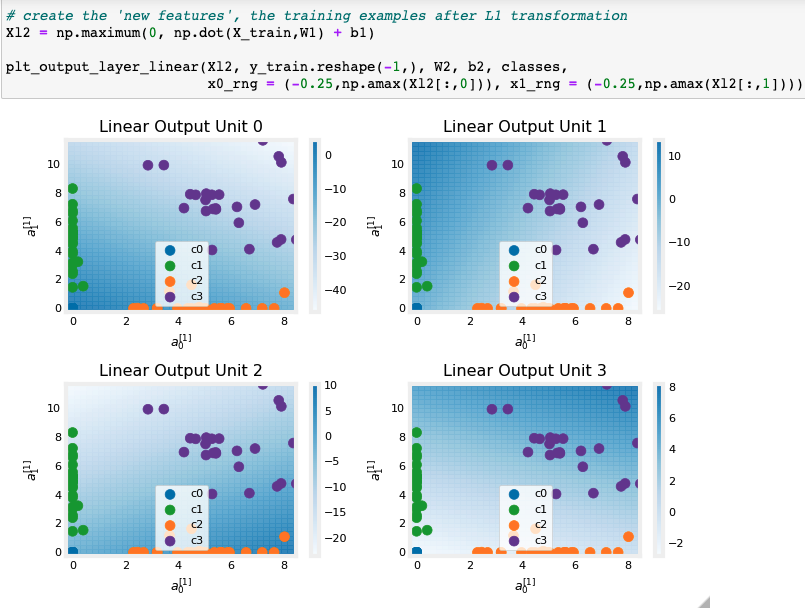

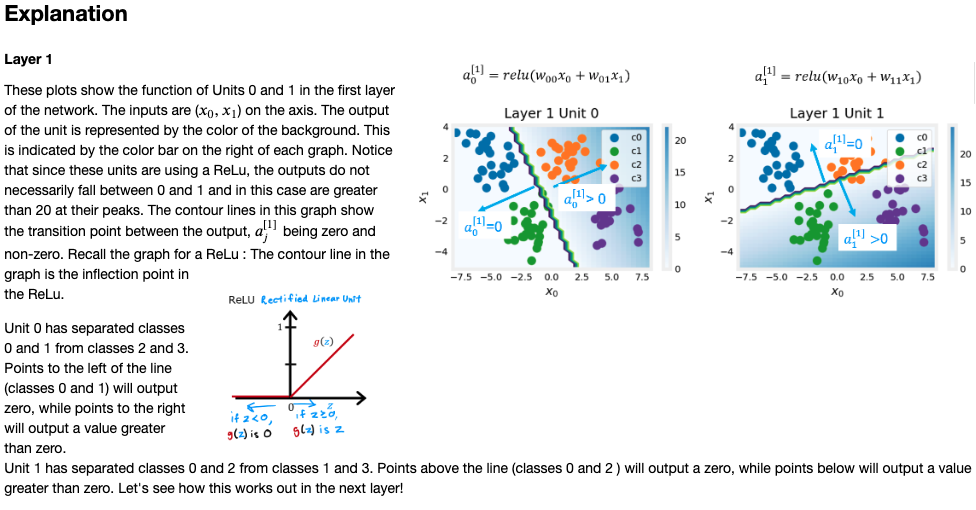

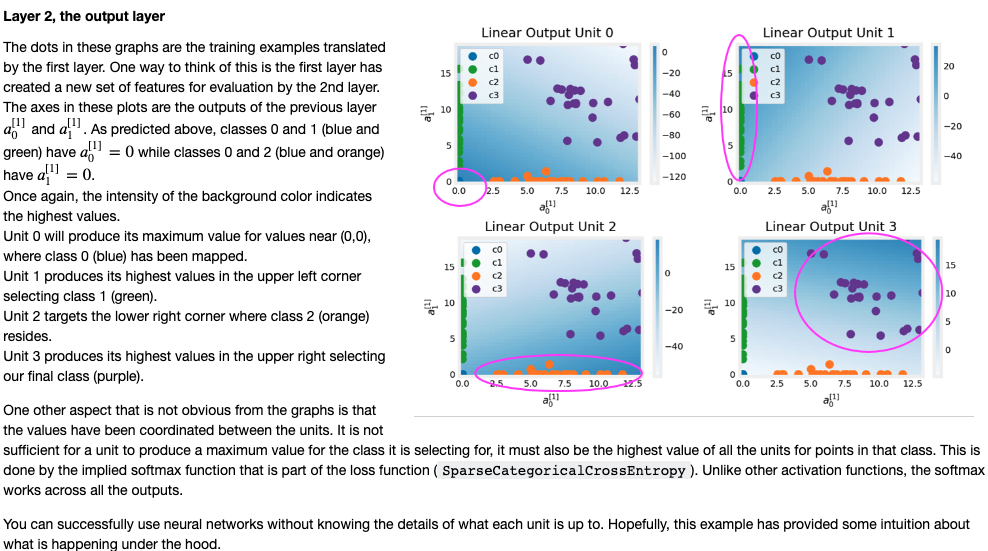